# Statistics and insights from trading strategy excel

In [1]:
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import warnings
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
warnings.filterwarnings("ignore")

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
# Update file location accordingly
df = pd.read_excel('D:\\Users\\amit\\Desktop\\מסחר\\strat test (RSI with VWAP direction).xlsx', sheet_name='Strategy Data Collection')
#Divide the 2 Tables from file
TradesTable = df[['Stock','TDate','Potential R','R Change in%','Candle Type','VWAP/MA50/LVL','Relative to VWAP','Touch Entry After R','Touch Stop?','RSI crossed?','Time to 2R','Time to Peak','InDayOrder']]
DaysTable = df[['Stock','Dates','H1 Direction','Total right RSI','Total Entries','Total Fakes','Daily Gap%','Daily Range']]

### Data cleaning

In [3]:
# Fixing headers:
header1 = list(DaysTable.columns)
headers1 = []
for i in header1:
    i = i.replace(' ','_')
    headers1.append(i)
headers1

header2 = list(TradesTable.columns)
headers2 = []
for i in header2:
    i = i.replace(' ','_')
    headers2.append(i)
headers2

DaysTable.columns = headers1
TradesTable.columns = headers2

# Fixing numbers formatted with % 
DaysTable['Daily_Gap%'] = DaysTable['Daily_Gap%']*100
TradesTable['R_Change_in%'] = TradesTable['R_Change_in%']*100

# Dropping pre-planned empty rows:
DaysTable.drop(DaysTable[DaysTable.Dates.isna()].index, inplace=True)
TradesTable.drop(TradesTable[TradesTable.TDate.isna()].index, inplace=True)

## Important graphs and tools

In [4]:
#Profit/loss Calculator by Destinations (2 so we can see and compare)
def calc(Dest1Rs, Dest1partial, Dest2Rs, Dest2partial, Dest3Rs, Dest3partial):

    Dest1Sum = TradesTable[TradesTable.Potential_R >= Dest1Rs].Potential_R.count() * Dest1Rs * (Dest1partial / 100)
    Dest2Sum = TradesTable[TradesTable.Potential_R >= Dest2Rs].Potential_R.count() * Dest2Rs * (Dest2partial / 100)
    Dest3Sum = TradesTable[TradesTable.Potential_R >= Dest3Rs].Potential_R.count() * Dest3Rs * (Dest3partial / 100)
    RSum = Dest1Sum + Dest2Sum + Dest3Sum
    LossInRs = TradesTable[TradesTable.Potential_R < Dest1Rs].Potential_R.count() * 1  # -1R if didnt reach dest1
    profit = RSum - LossInRs
    if Dest1partial + Dest2partial + Dest3partial > 100:
        print('!! Destination Partial exceeds 100% !!')
    print('Profit/Loss: ', 'Total='+str(round(profit,2))+'R  ', 'Profit='+str(round(RSum,2)), ' Loss='+str(round(LossInRs,2)))  
# what we do with trades we took partial and return to entry?? currently calculates close on entry after dest1 profit
# Note! it considers trades that don't reach dest1 as a loss of 1R !!
RValues = list(set((round(TradesTable.Potential_R * 2) / 2).sort_values(ascending=False).values)) #Potential R values rounded
forbars = []
for i in np.arange(0, max(RValues)+1, 0.5):
    counti = TradesTable[TradesTable.Potential_R>i].Potential_R.count()
    forbars = forbars + [i, counti]
x_values = np.arange(0, max(RValues)+1, 0.5)
y_values = np.arange(0,max(forbars[1::2])+5,5)

Dest1Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest1Rs')
Dest1partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest1partial')
Dest2Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest2Rs')
Dest2partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest2partial')
Dest3Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest3Rs')
Dest3partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest3partial')

calculator = widgets.interact(calc, Dest1Rs=Dest1Rs_widget, Dest1partial=Dest1partial_widget,
                 Dest2Rs=Dest2Rs_widget, Dest2partial=Dest2partial_widget,
                 Dest3Rs=Dest3Rs_widget, Dest3partial=Dest3partial_widget)

Dest1Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest1Rs')
Dest1partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest1partial')
Dest2Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest2Rs')
Dest2partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest2partial')
Dest3Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest3Rs')
Dest3partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest3partial')

calculator2 = widgets.interact(calc, Dest1Rs=Dest1Rs_widget2, Dest1partial=Dest1partial_widget2,
                 Dest2Rs=Dest2Rs_widget2, Dest2partial=Dest2partial_widget2,
                 Dest3Rs=Dest3Rs_widget2, Dest3partial=Dest3partial_widget2)

interactive(children=(FloatSlider(value=0.0, description='Dest1Rs', max=12.5, step=0.5), IntSlider(value=0, de…

interactive(children=(FloatSlider(value=0.0, description='Dest1Rs', max=12.5, step=0.5), IntSlider(value=0, de…

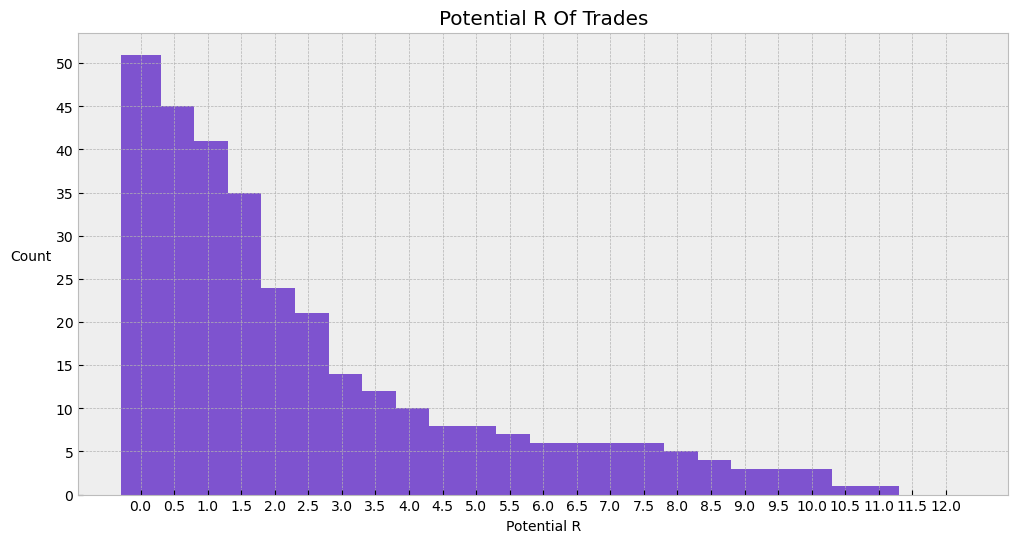

Counts each trade multiple times by how high of R it reached


In [5]:
RValues = list(set((round(TradesTable.Potential_R * 2) / 2).sort_values(ascending=False).values)) #Potential R values rounded
forbars = []
for i in np.arange(0, max(RValues)+1, 0.5):
    counti = TradesTable[TradesTable.Potential_R>i].Potential_R.count()
    forbars = forbars + [i, counti]
forbars[0::2] #values
forbars[1::2] #count
x_values = np.arange(0, max(RValues)+1, 0.5)
y_values = np.arange(0,max(forbars[1::2])+5,5)
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.xticks(x_values)
plt.yticks(y_values)
plt.title('Potential R Of Trades')
plt.xlabel('Potential R')
plt.ylabel('Count', rotation=0, labelpad=18)
plt.bar(forbars[0::2], forbars[1::2], width=0.6, color='#7e53cf')
plt.show()
print('Counts each trade multiple times by how high of R it reached')

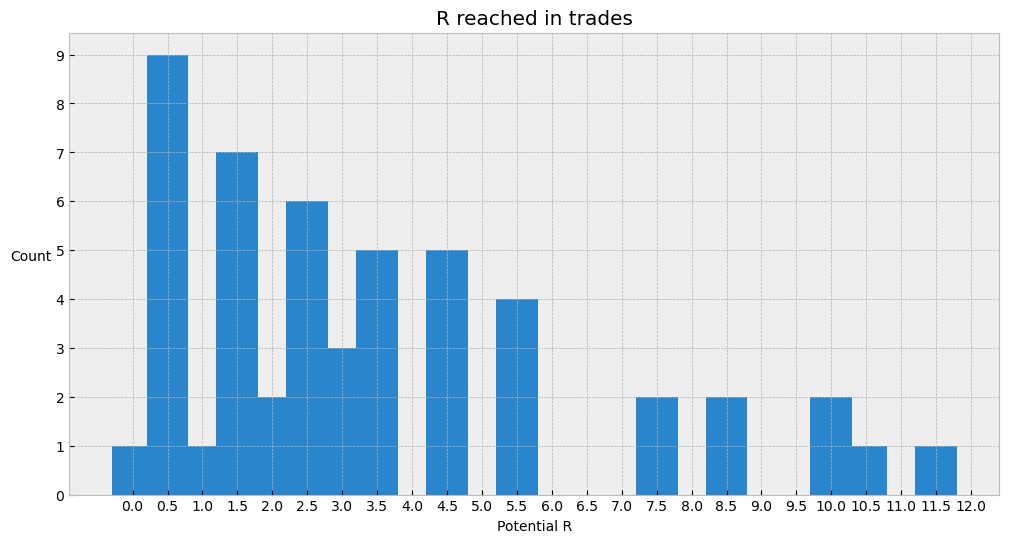

Count trades and their final value rounded by 0.5


In [6]:
RValues = list(set((round(TradesTable.Potential_R * 2) / 2).sort_values(ascending=False).values)) #Potential R values rounded
RCount = (round(TradesTable.Potential_R * 2) / 2).value_counts() # Potential R count rounded 0.5

x_values = np.arange(0, max(RValues)+1, 0.5)
y_values = np.arange(0,max(RCount)+1,1)
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.xticks(x_values)
plt.yticks(y_values)
plt.title('R reached in trades')
plt.xlabel('Potential R')
plt.ylabel('Count', rotation=0, labelpad=18)
plt.bar(RValues, RCount, width=0.6, color='#2986cc')
plt.show()
print('Count trades and their final value rounded by 0.5')

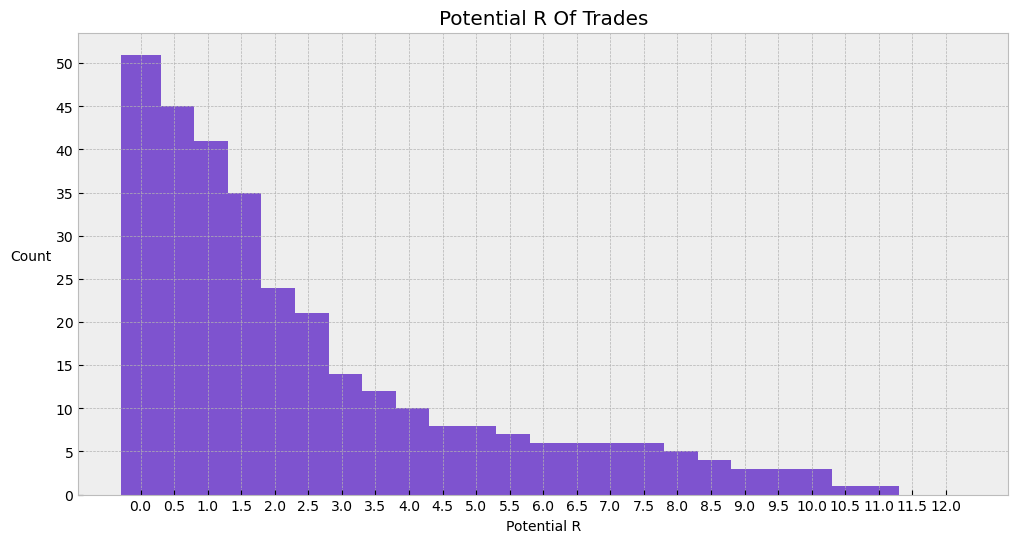

interactive(children=(FloatSlider(value=0.0, description='Dest1Rs', max=12.5, step=0.5), IntSlider(value=0, de…

interactive(children=(FloatSlider(value=0.0, description='Dest1Rs', max=12.5, step=0.5), IntSlider(value=0, de…

In [7]:
# previous commands run together for better visibility
RValues = list(set((round(TradesTable.Potential_R * 2) / 2).sort_values(ascending=False).values)) #Potential R values rounded
forbars = []
for i in np.arange(0, max(RValues)+1, 0.5):
    counti = TradesTable[TradesTable.Potential_R>i].Potential_R.count()
    forbars = forbars + [i, counti]
forbars[0::2] #values
forbars[1::2] #count
x_values = np.arange(0, max(RValues)+1, 0.5)
y_values = np.arange(0,max(forbars[1::2])+5,5)
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.xticks(x_values)
plt.yticks(y_values)
plt.title('Potential R Of Trades')
plt.xlabel('Potential R')
plt.ylabel('Count', rotation=0, labelpad=18)
plt.bar(forbars[0::2], forbars[1::2], width=0.6, color='#7e53cf')
plt.show()

#Profit/loss Calculator by Destinations (2 so we can see and compare)
def calc(Dest1Rs, Dest1partial, Dest2Rs, Dest2partial, Dest3Rs, Dest3partial):

    Dest1Sum = TradesTable[TradesTable.Potential_R >= Dest1Rs].Potential_R.count() * Dest1Rs * (Dest1partial / 100)
    Dest2Sum = TradesTable[TradesTable.Potential_R >= Dest2Rs].Potential_R.count() * Dest2Rs * (Dest2partial / 100)
    Dest3Sum = TradesTable[TradesTable.Potential_R >= Dest3Rs].Potential_R.count() * Dest3Rs * (Dest3partial / 100)
    RSum = Dest1Sum + Dest2Sum + Dest3Sum
    LossInRs = TradesTable[TradesTable.Potential_R < Dest1Rs].Potential_R.count() * 1  # -1R if didnt reach dest1
    profit = RSum - LossInRs
    if Dest1partial + Dest2partial + Dest3partial > 100:
        print('!! Destination Partial exceeds 100% !!')
    print('Profit/Loss: ', 'Total='+str(round(profit,2))+'R  ', 'Profit='+str(round(RSum,2)), ' Loss='+str(round(LossInRs,2)))  
# what we do with trades we took partial and return to entry?? currently calculates close on entry after dest1 profit
# Note! it considers trades that don't reach dest1 as a loss of 1R !!
Dest1Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest1Rs')
Dest1partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest1partial')
Dest2Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest2Rs')
Dest2partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest2partial')
Dest3Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest3Rs')
Dest3partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest3partial')

calculator = widgets.interact(calc, Dest1Rs=Dest1Rs_widget, Dest1partial=Dest1partial_widget,
                 Dest2Rs=Dest2Rs_widget, Dest2partial=Dest2partial_widget,
                 Dest3Rs=Dest3Rs_widget, Dest3partial=Dest3partial_widget)

Dest1Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest1Rs')
Dest1partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest1partial')
Dest2Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest2Rs')
Dest2partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest2partial')
Dest3Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest3Rs')
Dest3partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest3partial')

calculator2 = widgets.interact(calc, Dest1Rs=Dest1Rs_widget2, Dest1partial=Dest1partial_widget2,
                 Dest2Rs=Dest2Rs_widget2, Dest2partial=Dest2partial_widget2,
                 Dest3Rs=Dest3Rs_widget2, Dest3partial=Dest3partial_widget2)

## DayTable stats

In [8]:
#distributaion of Daily Directions:
print('In-Day direction accurance percentage:')
vallst = list(DaysTable.H1_Direction.value_counts())
indlst = list(DaysTable.H1_Direction.value_counts().index)
maxdays = DaysTable.shape[0]
for i in range (len(indlst)):
    print (indlst[i], str(round((vallst[i]/maxdays*100),2))+'%')

In-Day direction accurance percentage:
Up 29.63%
Down 22.22%
Unclear(up) 18.52%
Sideway 14.81%
Unclear(down) 14.81%


In [9]:
# Avg gap of Daily direction:
DaysTable[['H1_Direction','Daily_Gap%']].groupby('H1_Direction').mean().round(2).sort_values('Daily_Gap%', ascending=False)

,Daily_Gap%
H1_Direction,
Unclear(up),0.49
Sideway,0.45
Down,0.19
Up,0.07
Unclear(down),-0.05


In [10]:
# Avg of daily range
print('Daily range average is:', str(round(DaysTable.Daily_Range.mean(),2))+'$')

Daily range average is: 4.5$


In [11]:
print('Total entries, fakes and percentage:')
totalent= DaysTable[['Total_Entries']].sum()
fakeent = DaysTable[['Total_Fakes']].sum()
print(float(fakeent),'out of', float(totalent), 'entries.', str(round(float(fakeent)/float(totalent)*100,2))+'%')

Total entries, fakes and percentage:
11.0 out of 49.0 entries. 22.45%


## TradesTable stats

In [12]:
# Avg of potential R by entry candle type
TradesTable.groupby('Candle_Type').Potential_R.mean().sort_values(ascending=False)

Candle_Type
Middle    3.341429
Hammer    3.040952
Doji      2.776667
Bat       2.677333
Bad       1.845000
Name: Potential_R, dtype: float64

In [27]:
# how many trades touch entry after 1R and reached minimum 2R?
v1 = TradesTable[(TradesTable.Touch_Entry_After_R=='Yes before profit') & (TradesTable.Potential_R>=2)].shape[0]
v2 = TradesTable[TradesTable.Potential_R>=2].shape[0]
print(str(v1)+'/'+str(v2), 'of trades that reached min 2 R have returned to touch entry after 1R.', '('+str(round((v1/v2*100),2))+'%)')

2/27 of trades that reached min 2 R have returned to touch entry after 1R. (7.41%)


In [28]:
# Avg R all vs first daily trade
print ('Avg trades R change percentage:', str(round(TradesTable['R_Change_in%'].mean(),2))+'%')
print ('Avg first trades of day R change percentage:',str(round(TradesTable[TradesTable.InDayOrder==1]['R_Change_in%'].mean(),2))+'%')

Avg trades R change percentage: 0.35%
Avg first trades of day R change percentage: 0.5%


In [29]:
# Avg R all vs first daily trade
print ('Avg trades potential R:', round(TradesTable.Potential_R.mean(),2))
print ('Avg first trades of day potential R:',round(TradesTable[TradesTable.InDayOrder==1].Potential_R.mean(),2))

Avg trades potential R: 2.9
Avg first trades of day potential R: 4.22


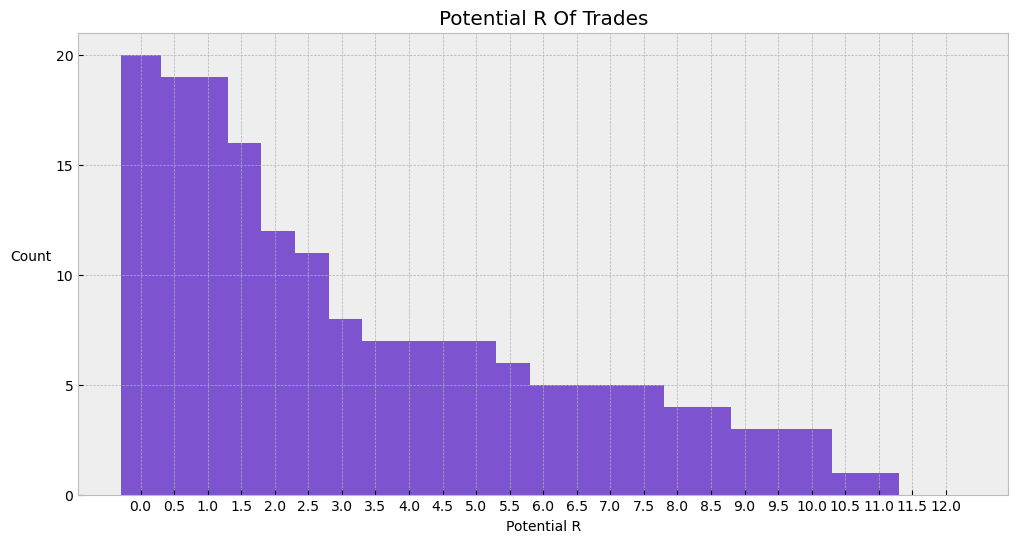

interactive(children=(FloatSlider(value=0.0, description='Dest1Rs', max=12.5, step=0.5), IntSlider(value=0, de…

interactive(children=(FloatSlider(value=0.0, description='Dest1Rs', max=12.5, step=0.5), IntSlider(value=0, de…

In [30]:
## Graph and calculator for first trades of the day.
TradesTableDT1 = TradesTable[TradesTable.InDayOrder==1]
RValues = list(set((round(TradesTableDT1.Potential_R * 2) / 2).sort_values(ascending=False).values)) #Potential R values rounded
forbars = []
for i in np.arange(0, max(RValues)+1, 0.5):
    counti = TradesTableDT1[TradesTableDT1.Potential_R>i].Potential_R.count()
    forbars = forbars + [i, counti]
forbars[0::2] #values
forbars[1::2] #count
x_values = np.arange(0, max(RValues)+1, 0.5)
y_values = np.arange(0,max(forbars[1::2])+5,5)
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.xticks(x_values)
plt.yticks(y_values)
plt.title('Potential R Of Trades')
plt.xlabel('Potential R')
plt.ylabel('Count', rotation=0, labelpad=18)
plt.bar(forbars[0::2], forbars[1::2], width=0.6, color='#7e53cf')
plt.show()

#Profit/loss Calculator by Destinations (2 so we can see and compare) !!Only for first trades of the day!!
def calc(Dest1Rs, Dest1partial, Dest2Rs, Dest2partial, Dest3Rs, Dest3partial):

    Dest1Sum = TradesTableDT1[TradesTableDT1.Potential_R >= Dest1Rs].Potential_R.count() * Dest1Rs * (Dest1partial / 100)
    Dest2Sum = TradesTableDT1[TradesTableDT1.Potential_R >= Dest2Rs].Potential_R.count() * Dest2Rs * (Dest2partial / 100)
    Dest3Sum = TradesTableDT1[TradesTableDT1.Potential_R >= Dest3Rs].Potential_R.count() * Dest3Rs * (Dest3partial / 100)
    RSum = Dest1Sum + Dest2Sum + Dest3Sum
    LossInRs = TradesTableDT1[TradesTableDT1.Potential_R < Dest1Rs].Potential_R.count() * 1  # -1R if didnt reach dest1
    profit = RSum - LossInRs
    if Dest1partial + Dest2partial + Dest3partial > 100:
        print('!! Destination Partial exceeds 100% !!')
    print('Profit/Loss: ', 'Total='+str(round(profit,2))+'R  ', 'Profit='+str(round(RSum,2)), ' Loss='+str(round(LossInRs,2)))  
# what we do with trades we took partial and return to entry?? currently calculates close on entry after dest1 profit
# Note! it considers trades that don't reach dest1 as a loss of 1R !!
RValues = list(set((round(TradesTableDT1.Potential_R * 2) / 2).sort_values(ascending=False).values)) #Potential R values rounded
forbars = []
for i in np.arange(0, max(RValues)+1, 0.5):
    counti = TradesTableDT1[TradesTableDT1.Potential_R>i].Potential_R.count()
    forbars = forbars + [i, counti]
x_values = np.arange(0, max(RValues)+1, 0.5)
y_values = np.arange(0,max(forbars[1::2])+5,5)

Dest1Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest1Rs')
Dest1partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest1partial')
Dest2Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest2Rs')
Dest2partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest2partial')
Dest3Rs_widget = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest3Rs')
Dest3partial_widget = widgets.IntSlider(min=0, max=100, step=1, description='Dest3partial')

calculator = widgets.interact(calc, Dest1Rs=Dest1Rs_widget, Dest1partial=Dest1partial_widget,
                 Dest2Rs=Dest2Rs_widget, Dest2partial=Dest2partial_widget,
                 Dest3Rs=Dest3Rs_widget, Dest3partial=Dest3partial_widget)

Dest1Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest1Rs')
Dest1partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest1partial')
Dest2Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest2Rs')
Dest2partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest2partial')
Dest3Rs_widget2 = widgets.FloatSlider(min=0, max=x_values[-1]+0.5, step=0.5, description='Dest3Rs')
Dest3partial_widget2 = widgets.IntSlider(min=0, max=100, step=1, description='Dest3partial')

calculator2 = widgets.interact(calc, Dest1Rs=Dest1Rs_widget2, Dest1partial=Dest1partial_widget2,
                 Dest2Rs=Dest2Rs_widget2, Dest2partial=Dest2partial_widget2,
                 Dest3Rs=Dest3Rs_widget2, Dest3partial=Dest3partial_widget2)